In [1]:
import numpy as np
import scipy.stats as sps
from scipy import integrate
import matplotlib as mpl
import matplotlib.pyplot as plt

# Continuous Random Variables

Continuous random variables are defined on *intervals* of values and the probability $P(X = x)$ is defined as equal to zero.

## Scalar Random Variables

### Probability Density Function

Since the probability of a continuous variable is defined on intervals, the function that describes it is different from the one for discrete variables. Namely, it's called the **probability density function** or **PDF**. Using the PDF, we can define the probability of a variable's value being in a given interval as:

$$
P(x_0 \leq X \leq x_1) = \int_{x_0}^{x_1}f(x)dx
$$

However, note that

$$
f(x) \neq P(X = x)
$$

This should come intuitively, since the probability is actually the area under the curve of $f(x)$, which is 0 when taken under a single point.

---
If we had the following PDF:

$$
f(x) = \begin{cases}
2x & x \in [0, 1] \\
0 & otherwise
\end{cases}
$$

its graph would look like this:

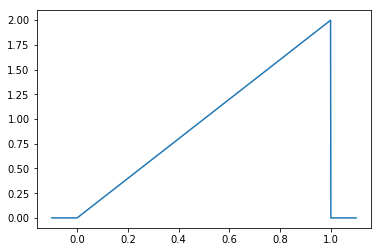

In [26]:
X = np.linspace(-0.1, 1.1, 1000)
f = lambda x: np.where((x >= 0) & (x <= 1), 2*x, 0)
plt.plot(X, f(X))

Notice that the maximum value of $f(x)$ here is $2$ - it is larger than $1$, however when we integrate over the whole domain, we get:

In [20]:
integrate.quad(f, -np.inf, np.inf)[0]

1.0

The result is $1$, which satisfies the definition of probability.

Therefore the properties of a PDF can be written as follows:

$$
\begin{aligned}
f(x) \geq 0& \\
\int_{-\infty}^\infty f(x)dx = 1 &
\end{aligned}
$$

From the graph, it is evident that $f(x)$ also satisfies the second property.

### Cumulative Distribution Function

The CDF for a continuous variable is very similar to that for discrete ones:

$$
F(x) = P(X \leq x) = \int_{-\infty}^xf(x)dx
$$

Again, if we plot the CDF of the above function, we get:

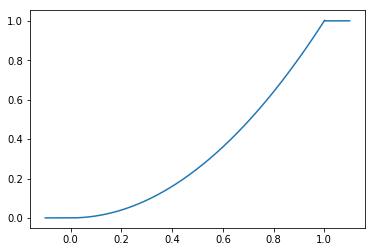

In [29]:
F = lambda x: integrate.quad(f, -np.inf, x)[0]
plt.plot(X, [F(x) for x in X])

Upon closer inspection, we can see that the probability that a variable falls within an interval is actually defined in terms of the CDF:

$$
P(x_0 \leq X \leq x_1) = \int_{x_0}^{x_1}f(x)dx = F(x_1) - F(x_0)
$$

## Parameters of Scalar Variables

For the most part, this is the same as with discrete variables, except that instead of sums, we integrate over the domain of the PDF.

### Expected Value

$$
\begin{aligned}
\mu &= E(g(X)) = \int_{-\infty}^{\infty}g(x)f(x)dx \\
E(aX + b) &= \int_{-\infty}^\infty{(ax + b)f(x)dx} \\
&= a\int_{-\infty}^\infty xf(x)dx + b\int_{-\infty}^\infty f(x)dx \\
&= aE(X) + b
\end{aligned}
$$

### Variance

$$
\begin{aligned}
\sigma^2 &= V(X) = \int_{-\infty}^\infty (x - \mu)^2f(x)dx \\
&= \int_{-\infty}^\infty x^2f(x)dx - \int_{-\infty}^\infty 2\mu xf(x)dx + \int_{-\infty}^\infty \mu^2f(x)dx \\
&= E(X^2) - 2\mu^2 + \mu^2 \\
&= E(X^2) - \mu^2
\end{aligned}
$$

## Parameters of 2D Vector Variables

### Joint Probability Density Function

$$
\begin{aligned}
f(x, y) = P(x_0 \leq X \leq x_1, y_0 \leq Y \leq y_1) = \int_{x_0}^{x_1}\int_{y_0}^{y_1}f(x, y)dxdy
\end{aligned}
$$

The joint density function satisfies the following:

$$
\begin{aligned}
f(x, y) \leq 0& \\
\int_{-\infty}^\infty\int_{-\infty}^\infty f(x,y) = 1&
\end{aligned}
$$

---
Take for example the joint distribution of $X$ and $Y = Z + X$, where $X$ and $Z$ are independent and have the same distribution with these outcomes $X,Z \in [0, 1]$. Given the distribution of $X$ and $Z$:

$$
f(x) = \begin{cases}
2x & x \in [0, 1] \\
0 & otherwise
\end{cases}
$$

Their joint density would look like this:

$$
f(x, y) = \begin{cases}
4x(y-x) & x, (y-x) \in [0, 1] \\
0 & otherwise
\end{cases}
$$

Plotting this yields:

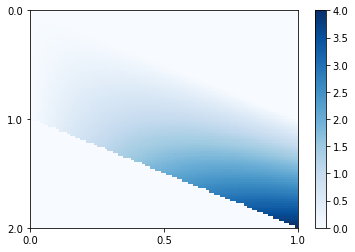

In [61]:
N = 100
X = np.linspace(0, 1, N)
Y = np.linspace(0, 2, N)
f = lambda x,y: 4*x*(y-x) if 0 <= x <= 1 and 0 <= (y-x) <= 1 else 0
pd = np.array([[f(x, y) for x in X] for y in Y])
ax = plt.gca()
fig = plt.gcf()
c = ax.pcolor(pd, cmap='Blues')
ax.set_xticks(np.linspace(0, N, 3), minor=False)
ax.set_yticks(np.linspace(0, N, 3), minor=False)
ax.set_yticklabels(np.linspace(0, 2, 3))
ax.set_xticklabels(np.linspace(0, 1, 3))
ax.invert_yaxis()
fig.colorbar(c, ax=ax)

### Marginal Probability Density Function

The same as with discrete variables:

$$
f_X(x) = \int_{-\infty}^\infty f(x,y)dy
$$

Using the above example, we can plot the marginal PDFs of $X$ and $Y$:

Text(0.5, 1.0, 'Marginal PDF of Y')

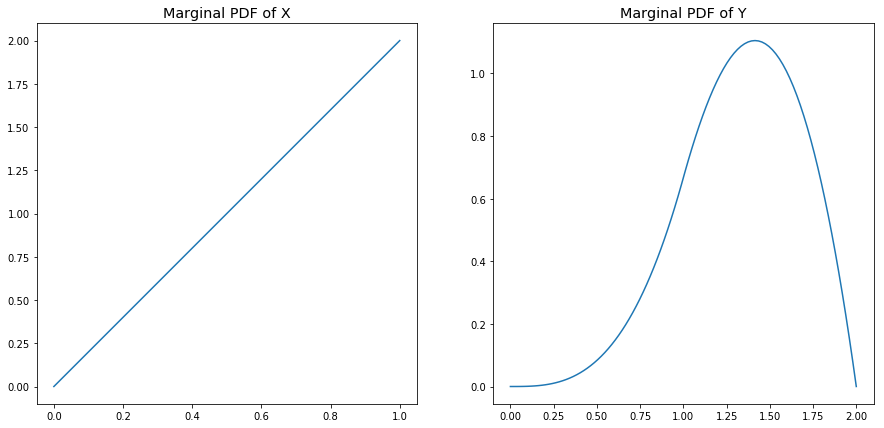

In [69]:
from functools import partial
fig,axes = plt.subplots(1, 2, figsize=(15, 7))
f_x = lambda x: integrate.quad(partial(f, x), -np.inf, np.inf)[0]
f_y = lambda y: integrate.quad(partial(f, y=y), -np.inf, np.inf)[0]
axes[0].plot(X, [f_x(x) for x in X])
axes[1].plot(Y, [f_y(y) for y in Y])
axes[0].set_title("Marginal PDF of X", fontsize="x-large")
axes[1].set_title("Marginal PDF of Y", fontsize="x-large")

## Parameters of 2D Random Vectors

### Expected Value

$$
\mu_X = E(X) = \int_{-\infty}^\infty\int_{-\infty}^\infty xf(x, y)dxdy
$$

Or for any function of $X$ and $Y$:

$$
E(g(X, Y)) = \int_{-\infty}^\infty\int_{-\infty}^\infty g(x, y)f(x,y)dxdy
$$



### Variance

$$
\sigma^2_X = V(X) = \int_{-\infty}^\infty\int_{-\infty}^\infty(x - \mu_X)^2f(x,y)dxdy = E(X^2) - \mu_X^2
$$

And for the general case:

$$
V(g(X, Y)) = \int_{-\infty}^\infty\int_{-\infty}^\infty (g(x, y) - E(g(X, Y)))^2f(x, y)dxdy
$$

### Covariance

$$
\sigma_{XY} = Cov(X, Y) = \int_{-\infty}^\infty\int_{-\infty}^\infty(x-\mu_X)(y - \mu_Y)f(x, y)dxdy \\
V(aX + bY) = a^2V(X) + b^2V(Y) + 2abCov(X, Y)
$$

### Correlation Coefficient

$$
\rho_{XY} = \frac{\sigma_{XY}}{\sigma_X\sigma_Y}
$$